In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# data

In [2]:
diabetes=datasets.load_diabetes()
X_p=diabetes.data[:,2] #과제는 혈압(data[:,3])과 bmi(data[:,2])에 대해 둘 다 나와있어 그냥 과제속 코드를 따르기로 함
X_d=diabetes.target
maxofX_d=max(X_d)
X_d=X_d/maxofX_d
X=[X_p,X_d]
data=np.transpose(X) # scikit-learn fit할 수 있도록 데이터 조정

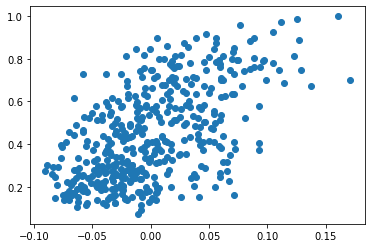

In [3]:
plt.scatter(X[0],X[1])

# Sclearn을 사용하지 않고

In [4]:
temp=[]
for (i,j) in zip(X[0],X[1]):
    r1=(i-0.025)**2+(j-0.2)**2 # (0.025,0.2)의 초기값과 각좌표의 거리
    r2=(i-0.025)**2+(j-0.4)**2 # (0.025,0.4)의 초기값과 각좌표의 거리
    r3=(i-0.025)**2+(j-0.6)**2 # (0.025,0.6)의 초기값과 각좌표의 거리
    r4=(i-0.025)**2+(j-0.8)**2 # (0.025,0.8)의 초기값과 각좌표의 거리
    m=min(r1,r2,r3,r4) # 각 좌표마다 가장 가까운 중심값에 매칭
    temp.append([r1,r2,r3,r4].index(m)) #각 좌표에 인덱스 부여

In [5]:
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
x4=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==3)])
# 새로운 중심점 좌표
r1=np.mean(x1[0]),np.mean(x1[1])
r2=np.mean(x2[0]),np.mean(x2[1])
r3=np.mean(x3[0]),np.mean(x3[1])
r4=np.mean(x4[0]),np.mean(x4[1])

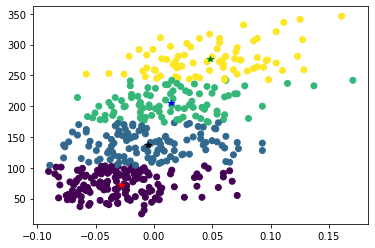

In [6]:
plt.scatter(X[0],X[1]*maxofX_d,c=temp)
plt.plot(r1[0],r1[1]*maxofX_d,'r*')
plt.plot(r2[0],r2[1]*maxofX_d,'k*')
plt.plot(r3[0],r3[1]*maxofX_d,'b*')
plt.plot(r4[0],r4[1]*maxofX_d,'g*')

# Sclearn을 사용하고

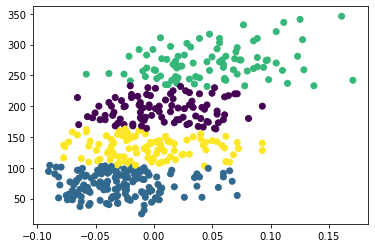

In [7]:
from sklearn.cluster import KMeans
km =KMeans(n_clusters=4 ,n_init=10) #10개의 새로운 랜덤한(중심점을 정하는 기준은 동일)좌표 중 이너셔가 가장 작은 모델을 반환.
km.fit(data)
plt.scatter(X[0],X[1]*maxofX_d,c=km.labels_)

# 최적의 클러스터 수를 구하는 법

## BayesianGaussianMixture

In [8]:
#불필요한 군집의 가중치를 0으로 만드는 베이지안 가우시안 혼합모델을 이용하면 최적의 클러스터 수를 구할 수 있음.
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=8,n_init=5)
bgm.fit(data)
np.round(bgm.weights_,2)

array([0.22, 0.27, 0.36, 0.15, 0.  , 0.  , 0.  , 0.  ])

필요한 클러스터 수는 0을 제외한 4개

## inertia

In [9]:
#K-Means Clustering에서 중심점의 좌표와 그에 해당하는 클러스터 속 데이터의 평균거리를 이너셔라 함.
kiner={}
for k in range(2, 10):
    km =KMeans(n_clusters=k)
    km.fit(data)
    kiner[k]=km.inertia_

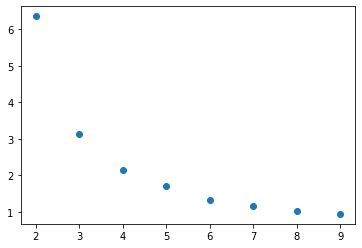

In [10]:
plt.plot(list(kiner.keys()), list(kiner.values()),'o') #이너셔가 작아지는 폭이 충분히 작아지기 시작하는 k=4로 클러스터 수 결정 